Affine transformations


What?


Affine transformation is the process of manipulating an image in such a way that the parallelism of lines, the collinearity of points and the ratios of distances are preserverd but all other parameters are not preserved.


Why?


Used to correct the geometric distortions and deformations that occur with non ideal camera angles. For e.g Satellite images


How?


Affine transformations rely on matrices to perform the various transformtion operations such as rotation, shearing etc.

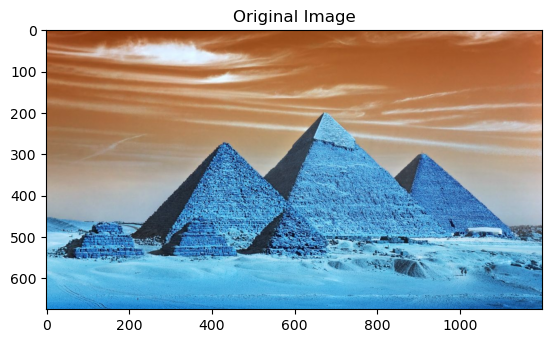

In [4]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
image = cv2.imread("/Users/chinmayeed/Documents/TataIQ_Intern/edgeDetection/giza.jpg")
plt.imshow(image), plt.title('Original Image')
plt.show()

In [5]:
#Making the appropriate matrices for the source and destination images
srcTri = np.array( [[0, 0], [image.shape[1] - 1, 0], [0, image.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, image.shape[1]*0.33], [image.shape[1]*0.85, image.shape[0]*0.25], [image.shape[1]*0.15, image.shape[0]*0.7]] ).astype(np.float32)

In [6]:
#Preparing the warp matrix
warpmat = cv2.getAffineTransform(srcTri, dstTri)

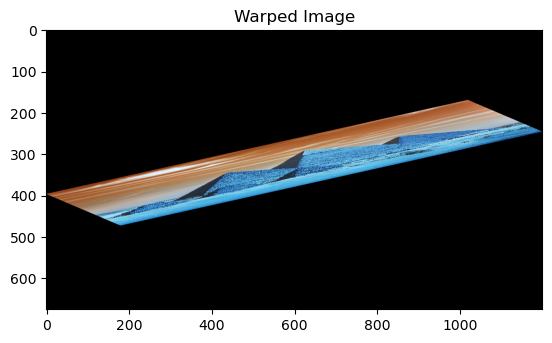

In [7]:
#Performing the warp operation on the image
warp_dst = cv2.warpAffine(image, warpmat, (image.shape[1], image.shape[0]))
plt.imshow(warp_dst), plt.title('Warped Image')
plt.show()


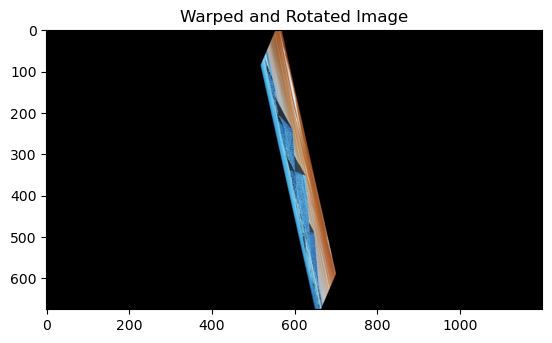

In [8]:
#Performing a rotate operation on the image along it's exact center
center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = 270
scale = 0.6
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
plt.imshow(warp_rotate_dst), plt.title('Warped and Rotated Image')
plt.show()
